In [4]:
%run ../includes/common-20230414.ipynb

CPython 2023-12-27T00:00:24.322763


CPU times: user 1.09 ms, sys: 0 ns, total: 1.09 ms
Wall time: 1.89 ms


In [60]:
resultfiles = {
    'Baleen': 'runs/example/baleen/prefetch_ml-on-partial-hit/ml-ap-0.798545_6_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'RejectX': 'runs/example/rejectx/rejectx-ap-1_0.508154_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
}

In [61]:
res = {}
for label, filename in resultfiles.items():
    res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)


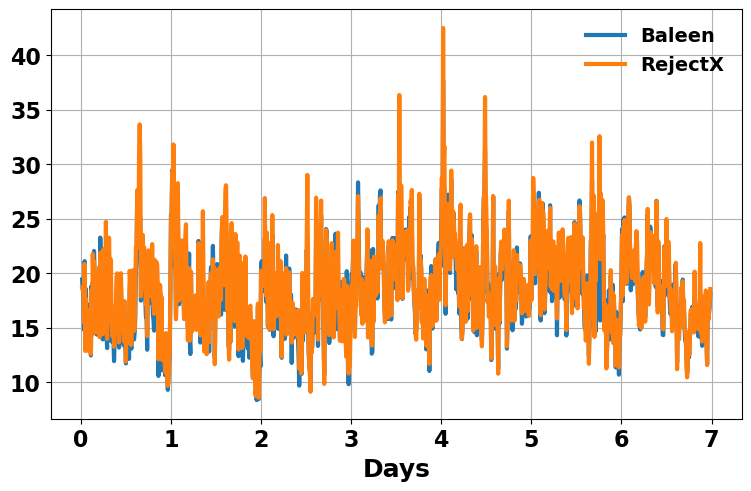

In [83]:
ax = plt.gca()
for label, resv in res.items():
    d_ = res[label].progress['GET+PUT'][600]
    d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
    d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

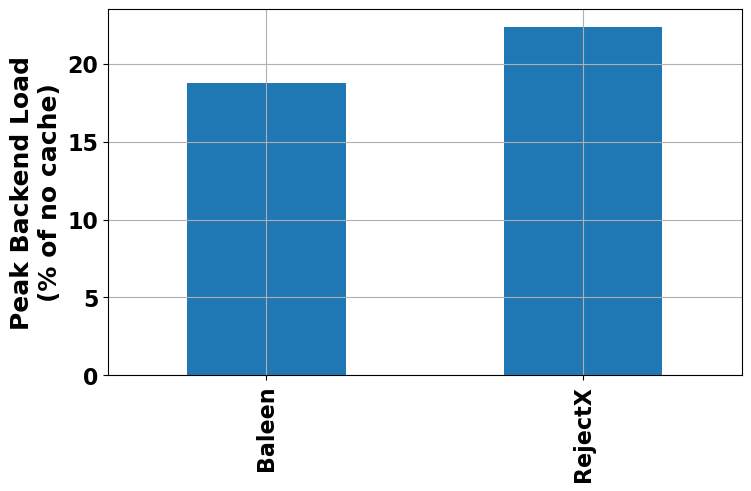

In [71]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)
df['PeakServiceTimeUsedRatio1'] = 1 - df['PeakServiceTimeSavedRatio1']
(df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label')['PeakServiceTimeUsedRatio1'] * 100) .plot.bar()
plt.ylabel("Peak Backend Load\n(% of no cache)")
plt.xlabel("")
pass

In [82]:
df_ = (df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label'))['PeakServiceTimeUsedRatio1']
print("Savings in Peak Load from Baleen on Region1, Sample 0")
print((1 - df_.loc['Baleen'] / df_.loc['RejectX'])*100)

Savings in Peak Load from Baleen on Region1, Sample 0
16.114302606382612
